In [1]:
from google.colab import files

uploaded = files.upload()


Saving Raw Dataset.csv to Raw Dataset.csv


In [2]:
import pandas as pd

# Load raw and processed datasets
raw_df = pd.read_csv("Raw Dataset.csv")

# Display info
raw_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 33 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 2028 non-null   object
 1   2. Gender                                                                                                                                                              2028 non-null   object
 2   3. University                                                                                               

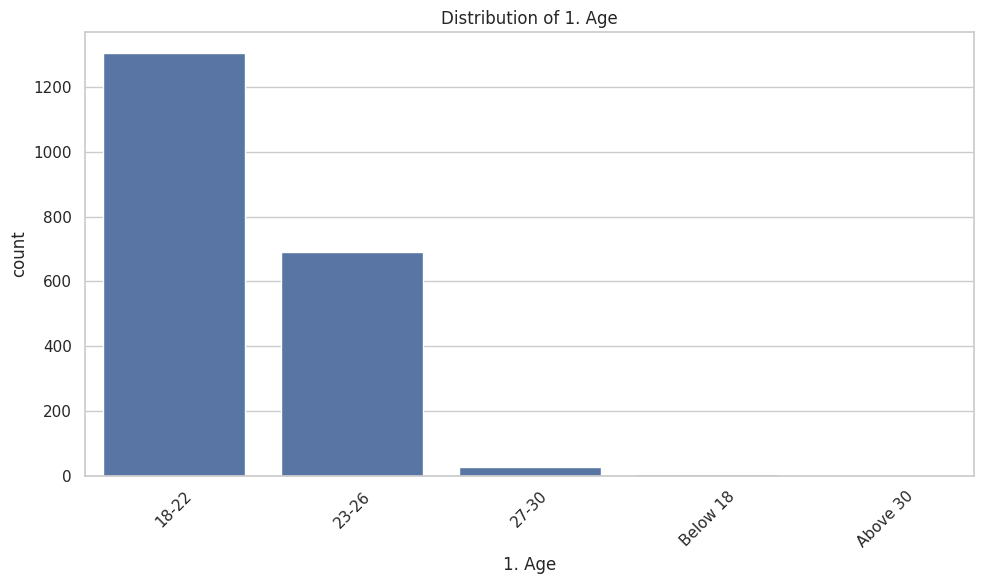

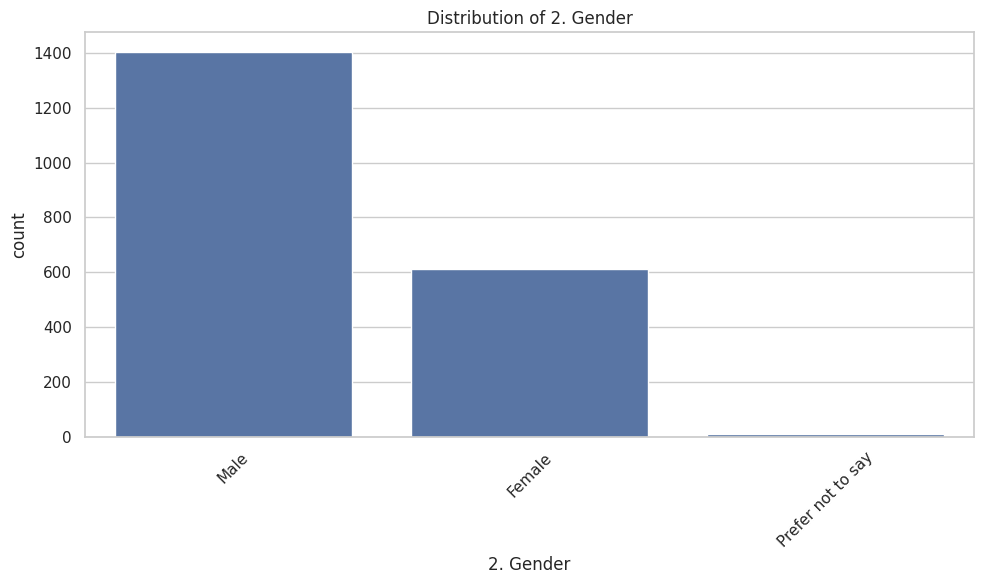

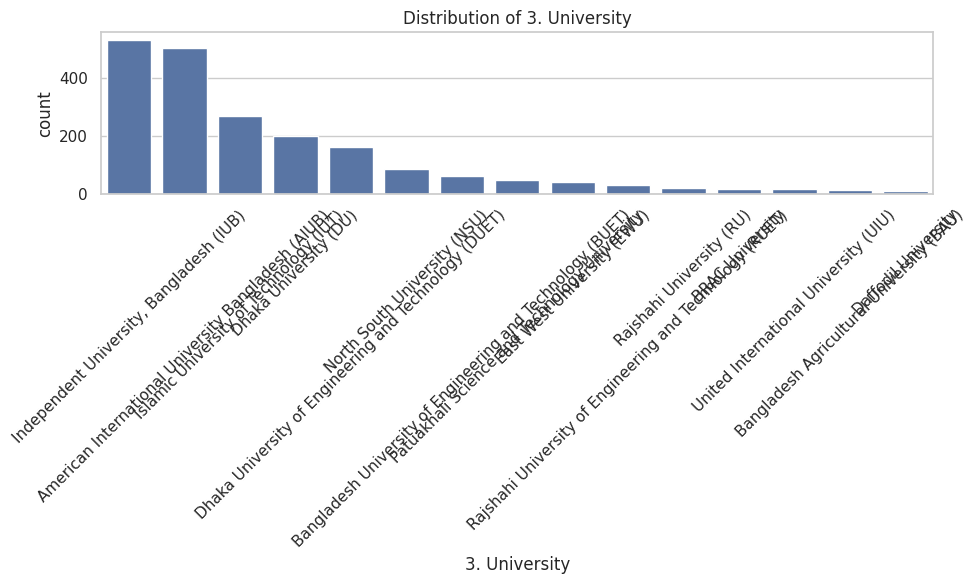

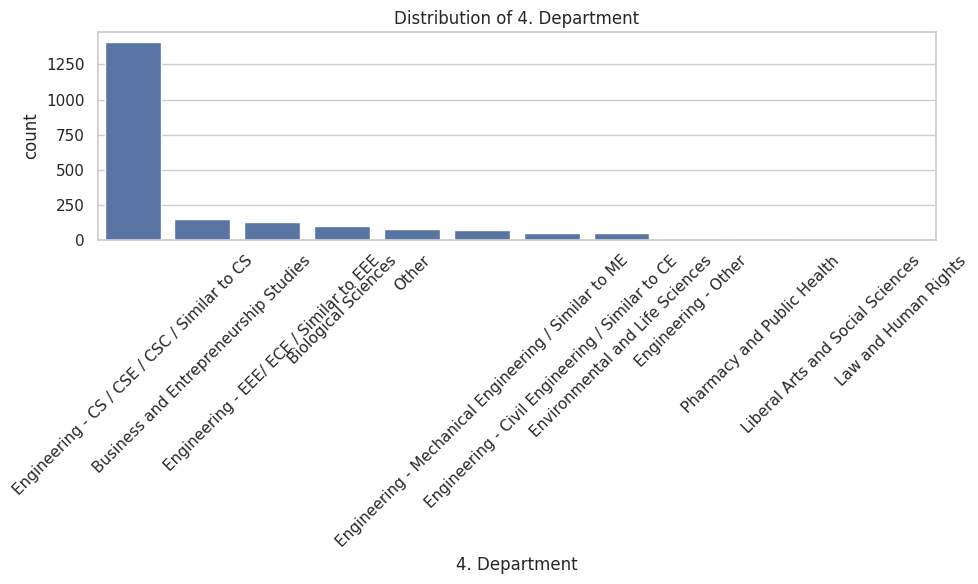

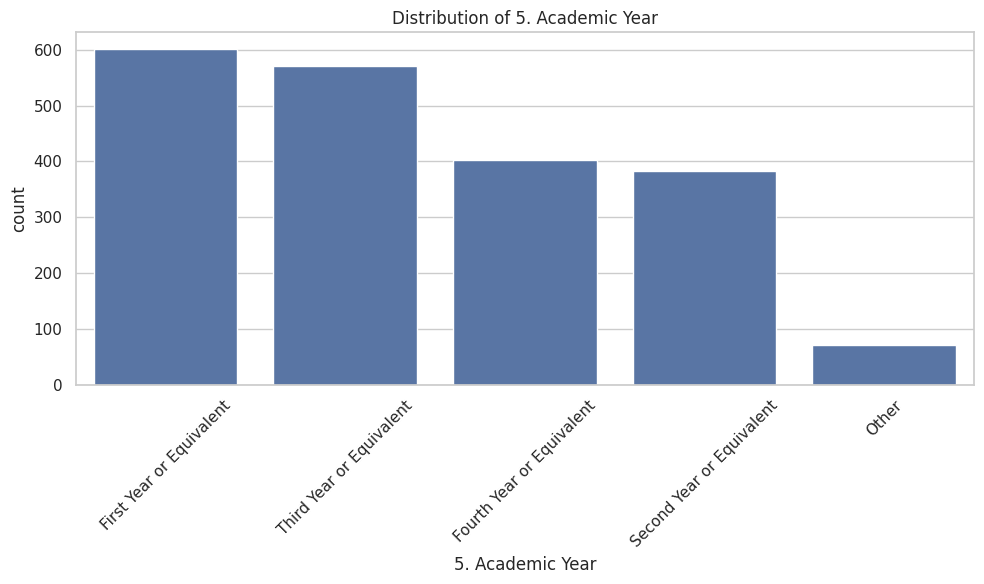

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visual quality
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# List of major categorical demographic features
categorical_cols = [
    '1. Age', '2. Gender', '3. University',
    '4. Department', '5. Academic Year',
    '6. Current CGPA',
    '7. Did you receive a waiver or scholarship at your university?'
]

# Plot first 5
for col in categorical_cols[:5]:
    plt.figure()
    sns.countplot(data=raw_df, x=col, order=raw_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

#Gender, University, and Department Bias in dataset

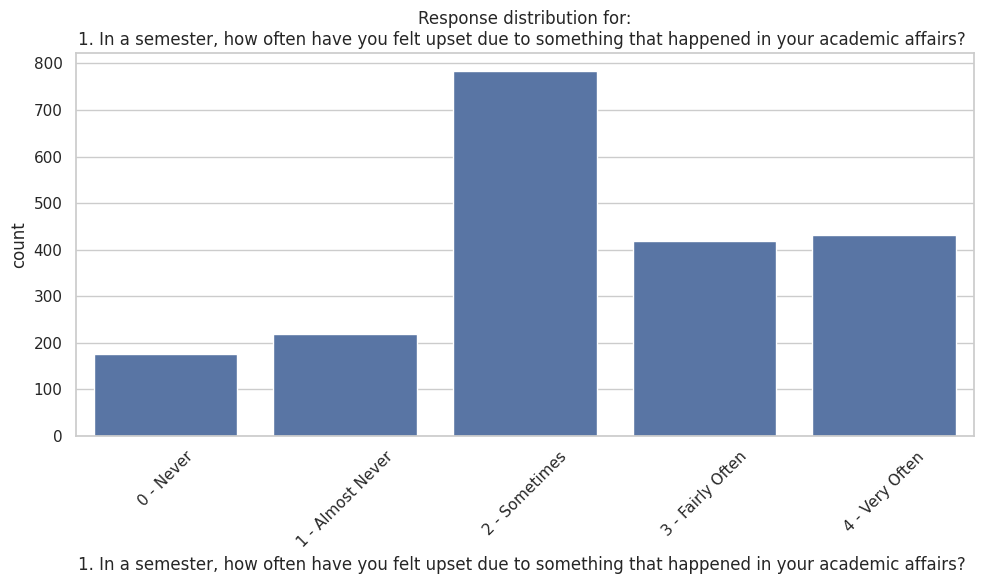

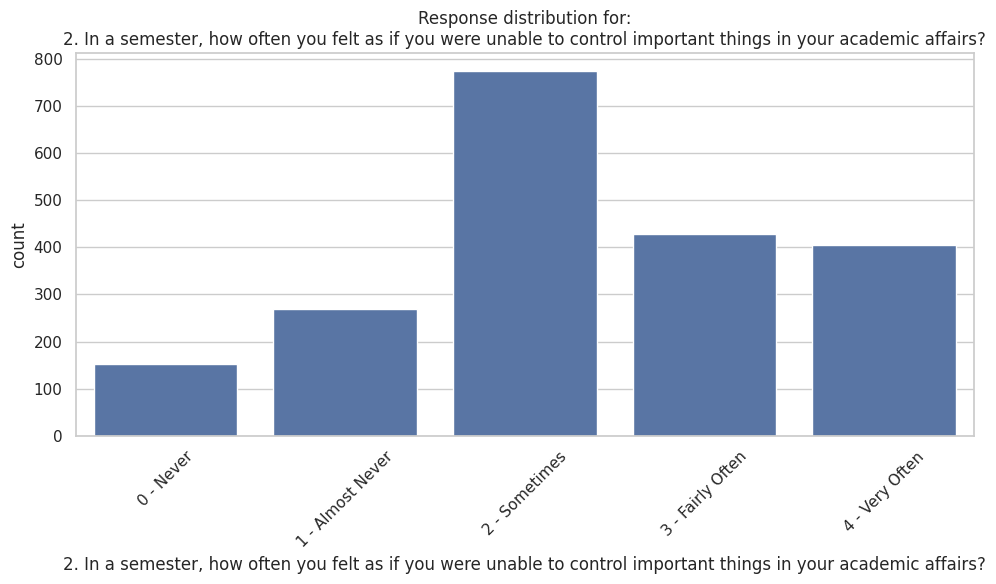

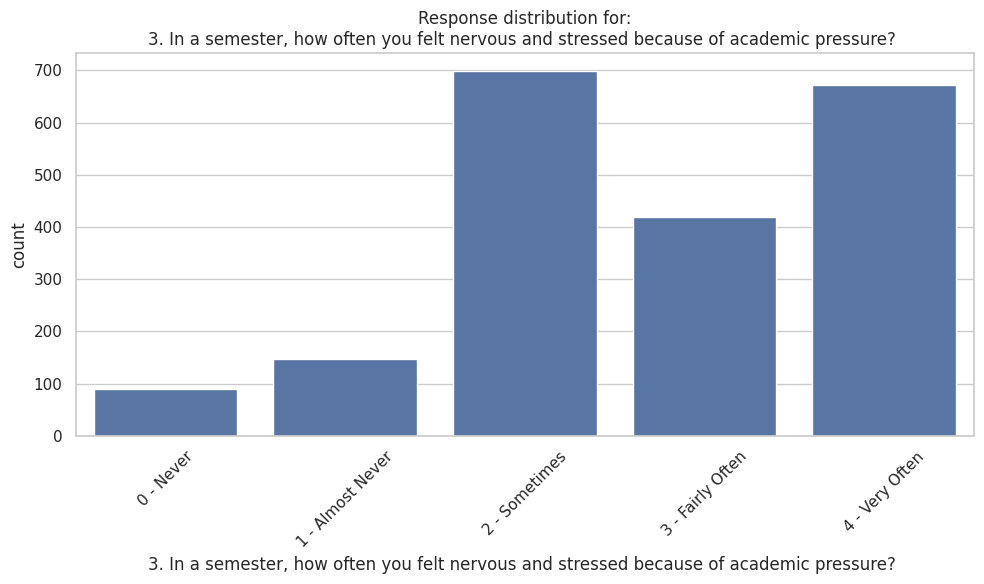

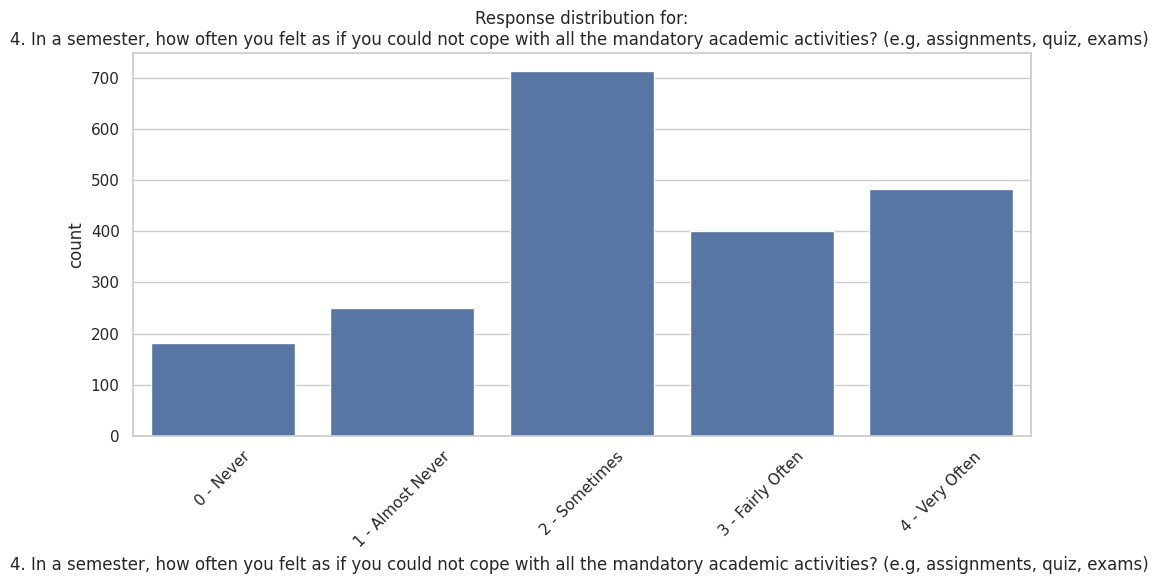

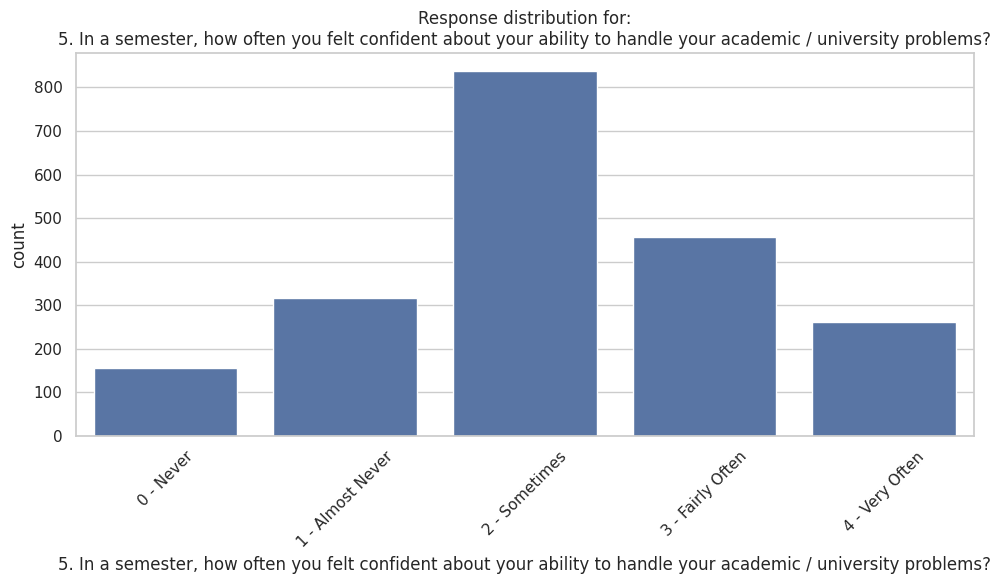

In [4]:
# Select 5 example GAD/PSS/PHQ survey columns
example_survey_cols = raw_df.columns[7:12]  # First few survey question columns

for col in example_survey_cols:
    plt.figure()
    sns.countplot(data=raw_df, x=col, order=sorted(raw_df[col].unique()))
    plt.xticks(rotation=45)
    plt.title(f"Response distribution for:\n{col}")
    plt.tight_layout()
    plt.show()

#Higher median answers

In [5]:
from google.colab import files

uploaded = files.upload()


Saving Processed.csv to Processed.csv


In [6]:
import pandas as pd

processed_df = pd.read_csv("Processed.csv")

processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    2028 non-null   object
 1   Gender                 2028 non-null   object
 2   University             2028 non-null   object
 3   Department             2028 non-null   object
 4   Academic_Year          2028 non-null   object
 5   Current_CGPA           2028 non-null   object
 6   waiver_or_scholarship  2028 non-null   object
 7   PSS1                   2028 non-null   int64 
 8   PSS2                   2028 non-null   int64 
 9   PSS3                   2028 non-null   int64 
 10  PSS4                   2028 non-null   int64 
 11  PSS5                   2028 non-null   int64 
 12  PSS6                   2028 non-null   int64 
 13  PSS7                   2028 non-null   int64 
 14  PSS8                   2028 non-null   int64 
 15  PSS9                 

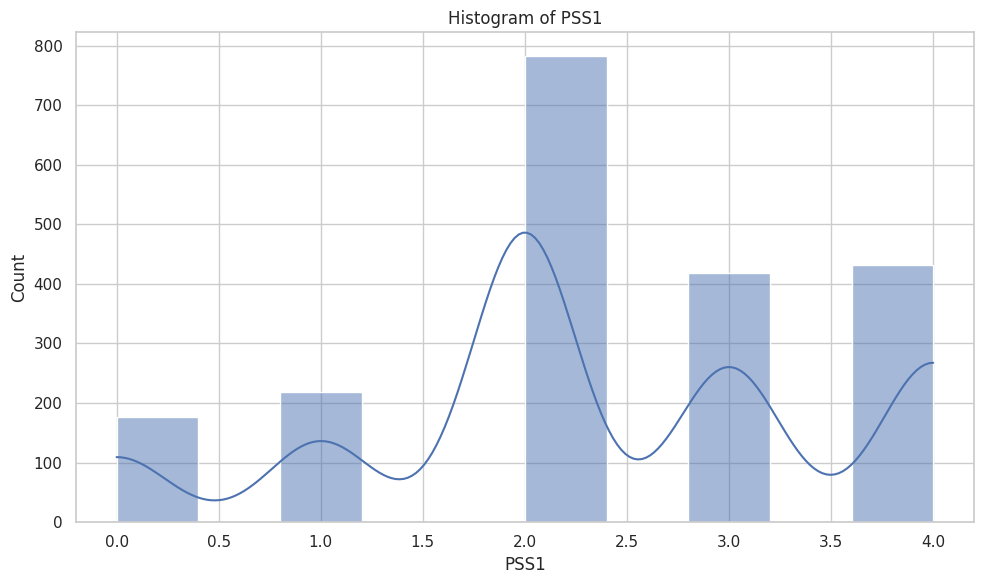

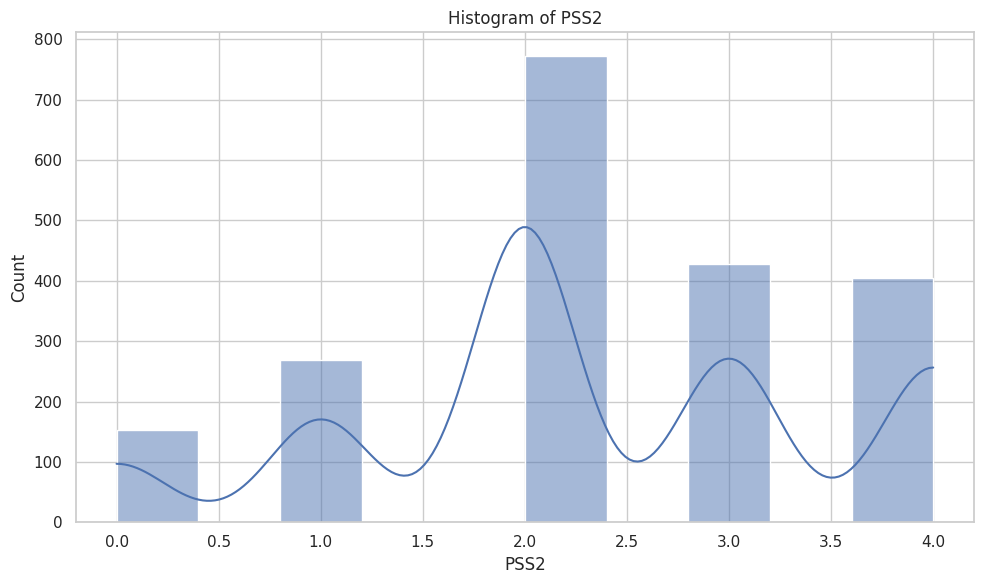

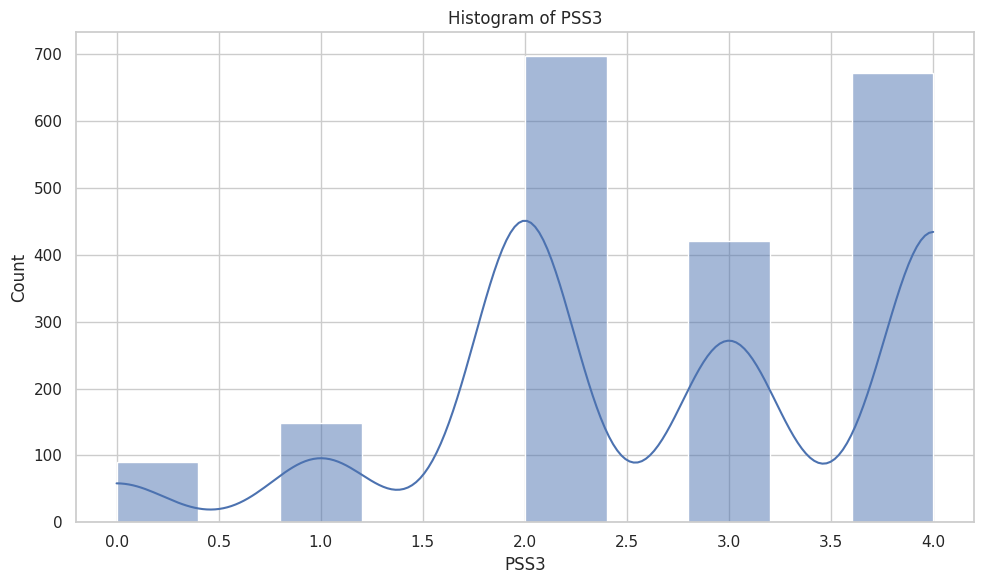

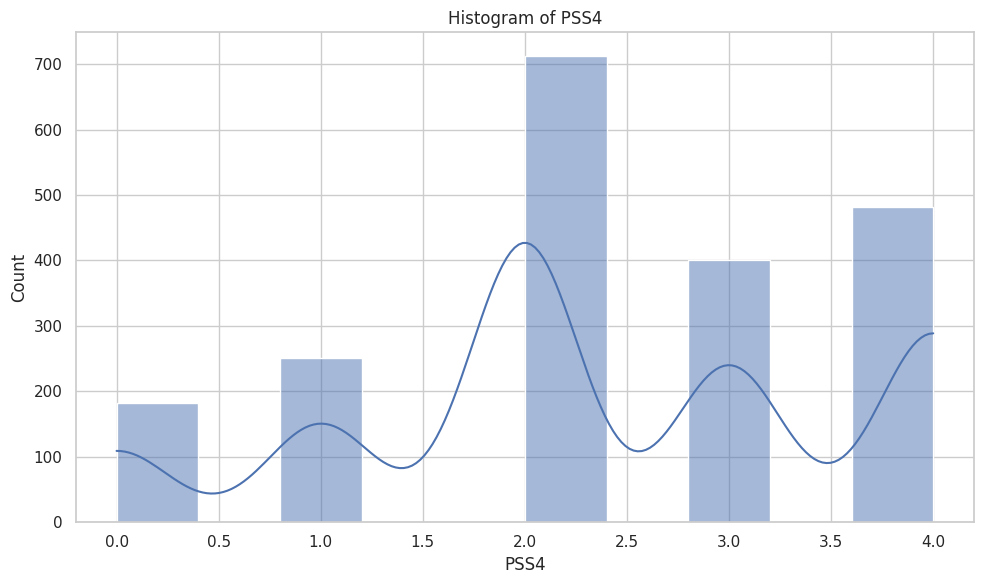

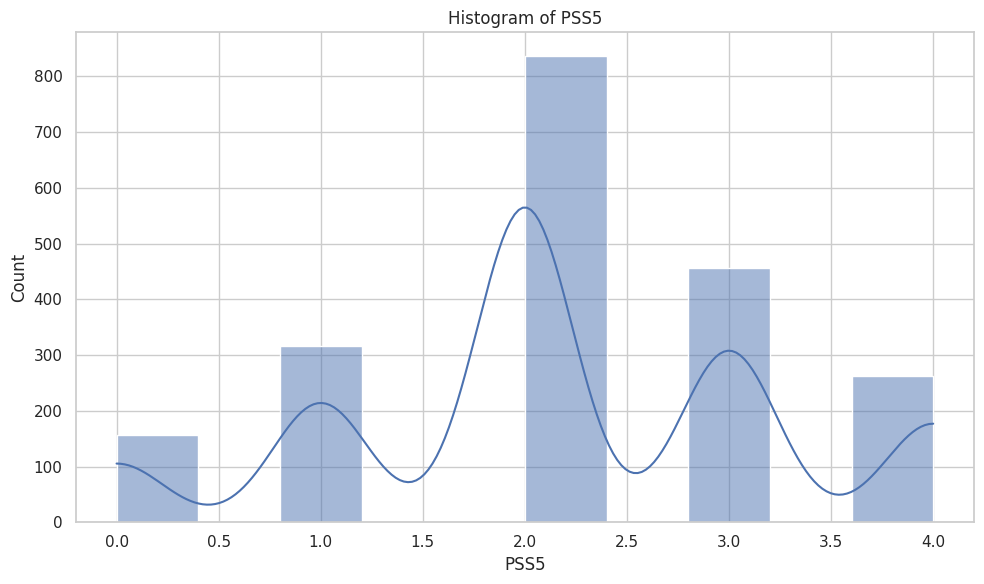

In [7]:
# Identify numeric columns
numeric_cols = processed_df.select_dtypes(include=['float64', 'int64']).columns

# Plot 5 most important numerical histograms
for col in numeric_cols[:5]:
    plt.figure()
    sns.histplot(processed_df[col], kde=True, bins=10)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

#Score histograms based on common answers for questions

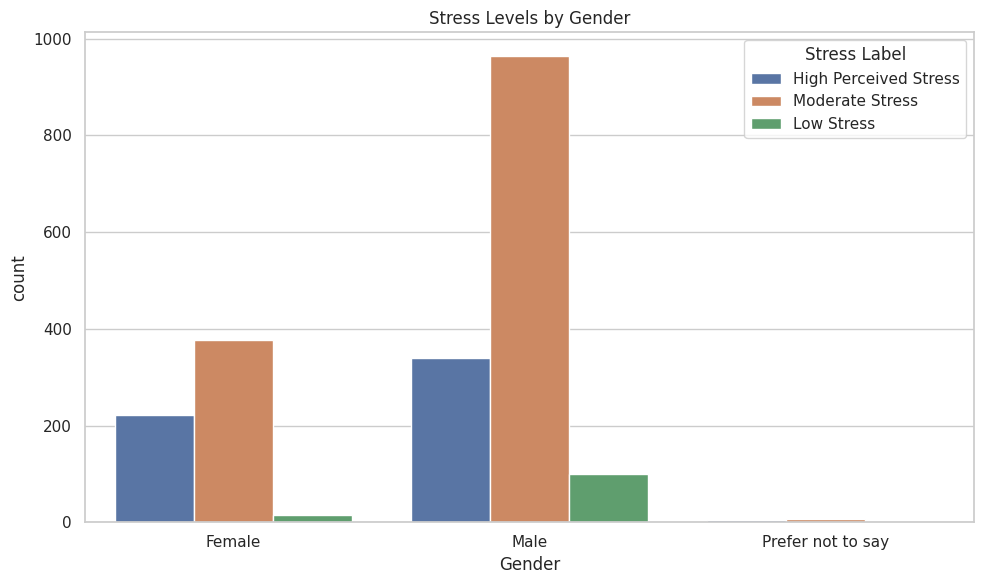

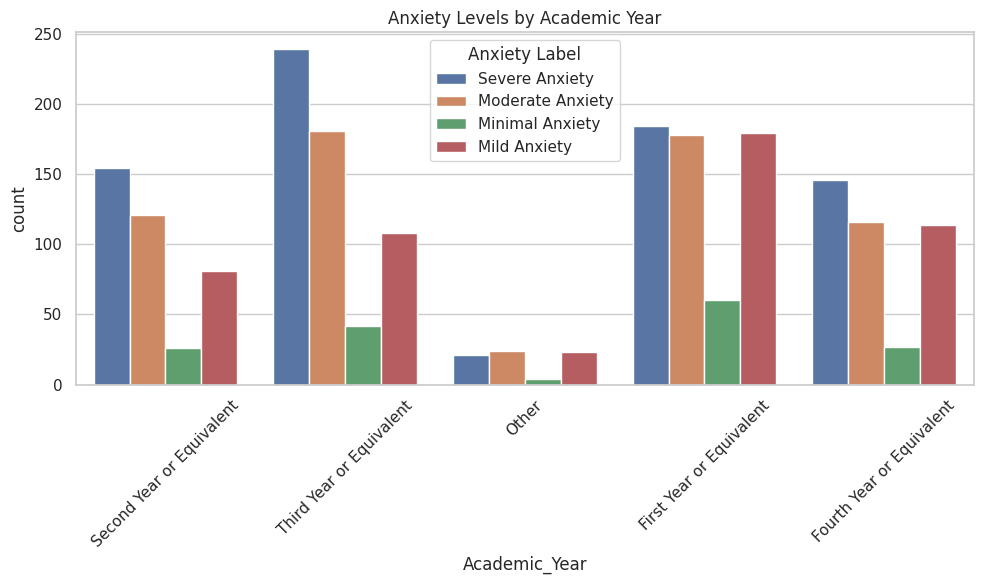

In [8]:
# Gender vs Stress Level
sns.countplot(data=processed_df, x='Gender', hue='Stress Label')
plt.title("Stress Levels by Gender")
plt.tight_layout()
plt.show()

# Academic Year vs Anxiety Level
sns.countplot(data=processed_df, x='Academic_Year', hue='Anxiety Label')
plt.title("Anxiety Levels by Academic Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Demographic based data bias

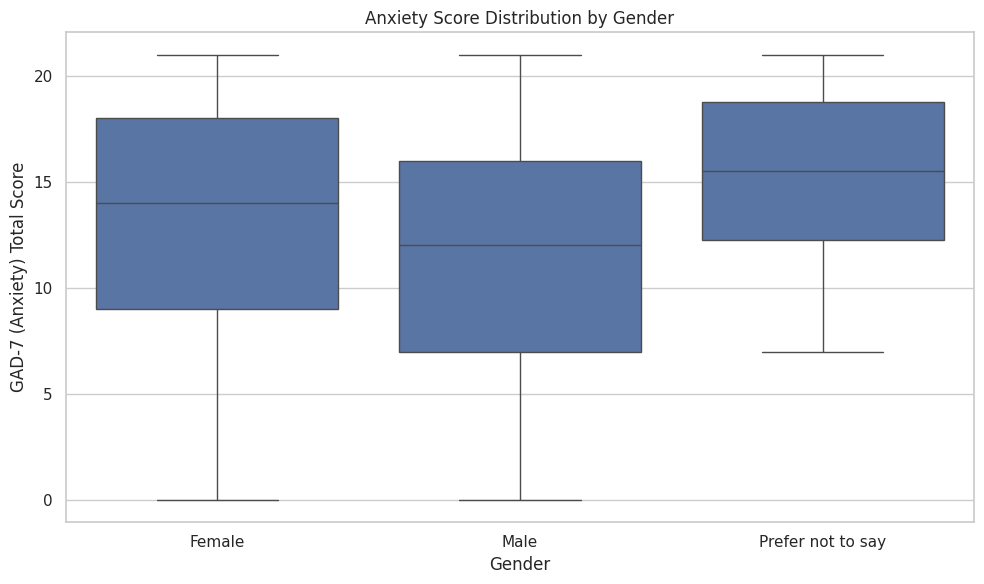

In [9]:
sns.boxplot(data=processed_df, x='Gender', y='Anxiety Value')
plt.title("Anxiety Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("GAD-7 (Anxiety) Total Score")
plt.tight_layout()
plt.show()

#Gender based data boxplot

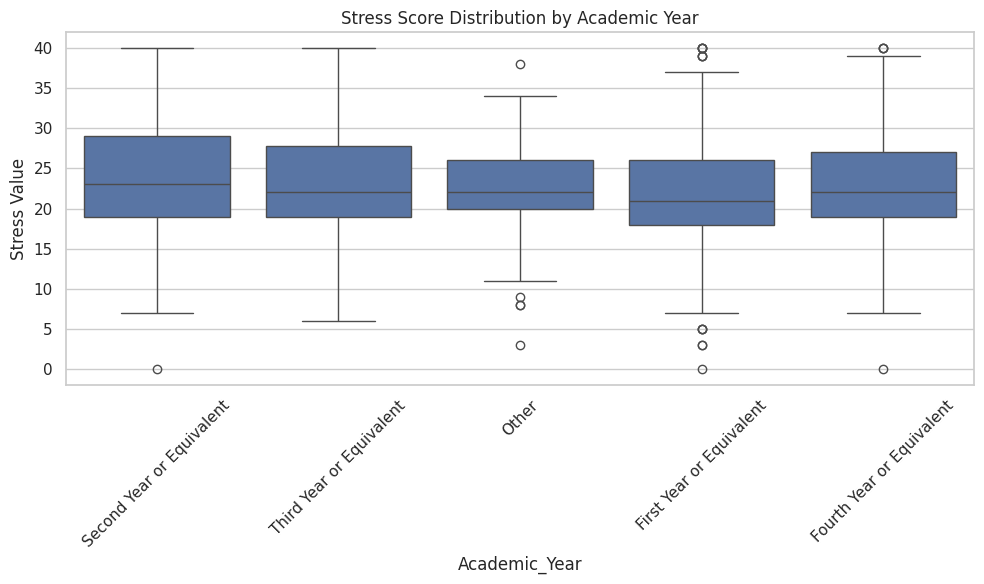

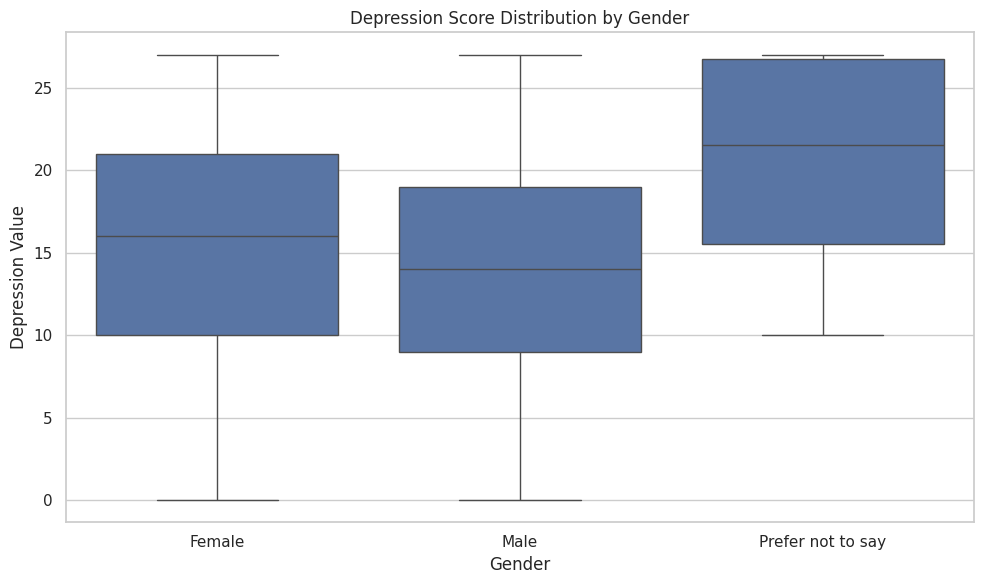

In [10]:
# Stress Score by Academic Year
sns.boxplot(data=processed_df, x='Academic_Year', y='Stress Value')
plt.title("Stress Score Distribution by Academic Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Depression Score by Gender
sns.boxplot(data=processed_df, x='Gender', y='Depression Value')
plt.title("Depression Score Distribution by Gender")
plt.tight_layout()
plt.show()


#Academic Progress based boxplots

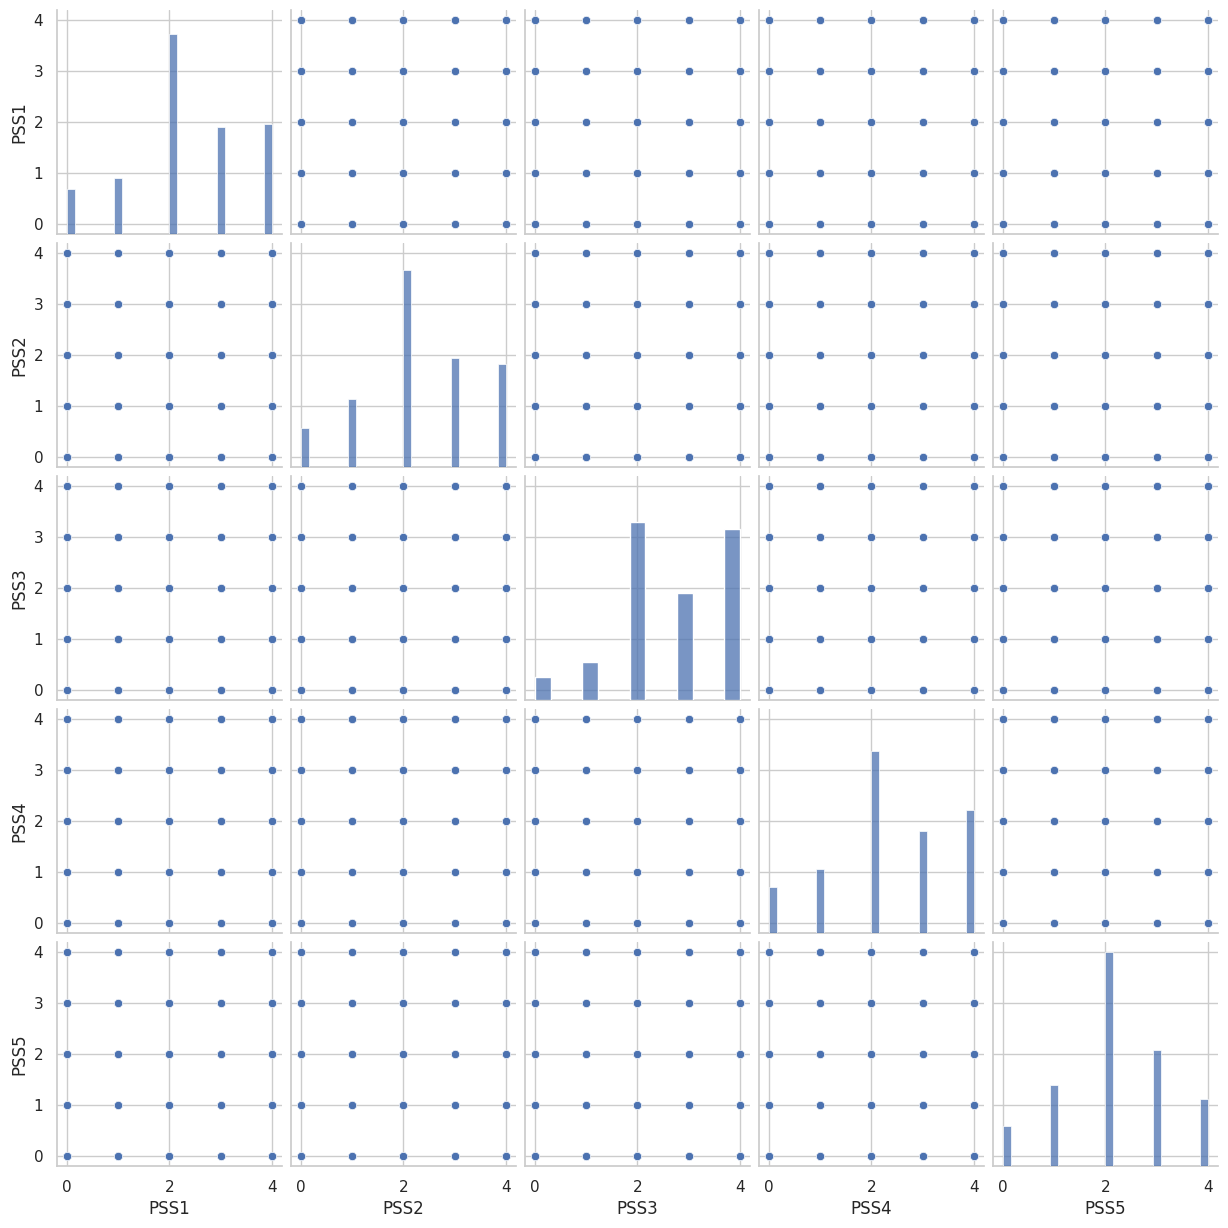

In [11]:
# Pick top 5 numerical fields for pairplot
sns.pairplot(processed_df[numeric_cols[:5]])
plt.show()


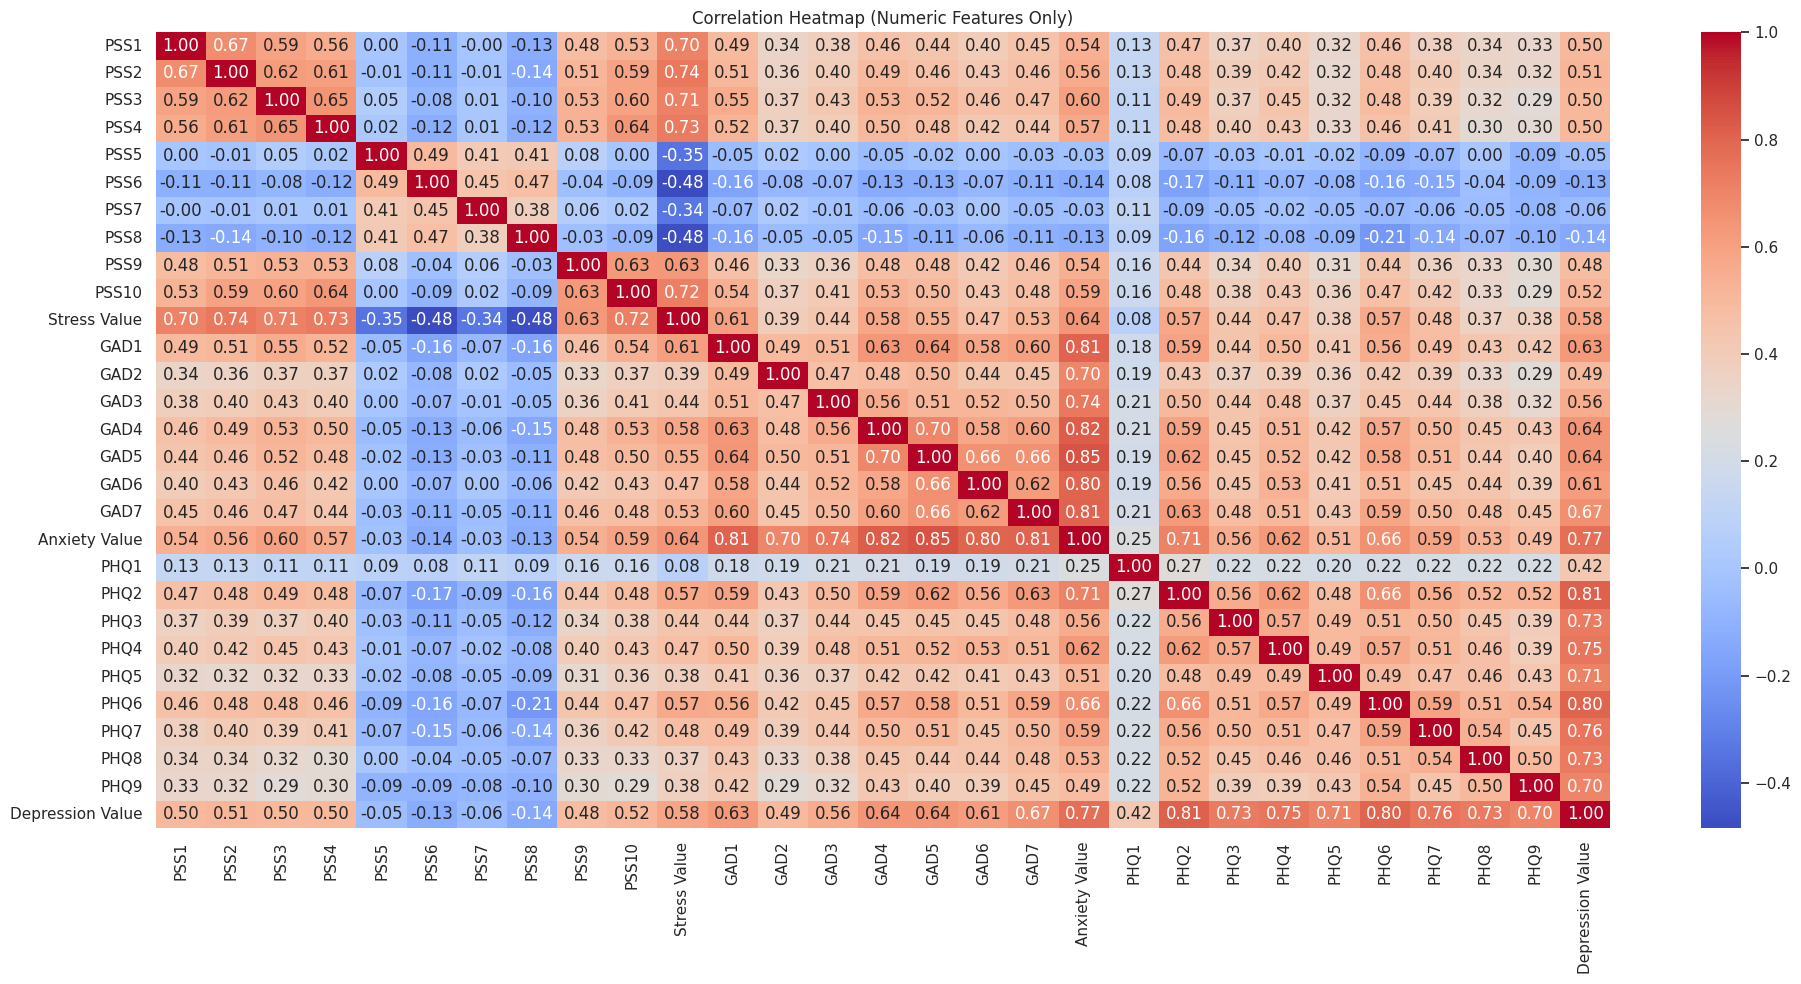

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numeric columns for correlation
numeric_df = processed_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

#Correlation matrix for Questionnaire's answers compared with final values.